#### Notes
- Will need to incorporate weight at some point in order to compete with strava


Input features:
Concatenation of 5 time-series datapoints, each having:
- Time delta from previous point
- Latitude delta from previous point
- Longitude delta from previous point
- Elevation delta from previous point
- Wind speed
- Wind direction

Justifications
- Time delta: Need to represent time, but want the model to be robust to time of day, date in time.
- Latitude delta: Need to represent distance, but want the model to be robust to location
- Longitude delta: Need to represent distance, but want the model to be robust to location
- Elevation delta: Need to represent elevation, but want the model to be robust to location

Output features:
- 5 second power in watts (target)

Cross/validate
- Lat/lon delta only
- Instantaneous speed only
- Instantaneous speed + lat/lon delta

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
from data.util import fit_to_df
from data.wind import WindAPI

ModuleNotFoundError: No module named 'torch'

In [14]:
df = fit_to_df('../data/Afternoon_Ride (1).fit')

In [15]:
# Take a 5 second moving average of the power data
df['power_5s'] = df['power'].rolling(5).mean()

In [ ]:
class STPowerDataset:
    def __init__(self,
                 fit_dataframe: pd.DataFrame,
                 time_column='timestamp',
                 latitude_column='position_lat',
                 longitude_column='position_long',
                 elevation_column='enhanced_altitude',
                 power_column='power',)

In [20]:
df

,altitude,enhanced_altitude,timestamp,distance,enhanced_speed,gps_accuracy,heart_rate,position_lat,position_long,speed,...,temperature,cadence,calories,left_pedal_smoothness,left_right_balance,left_torque_effectiveness,power,right_pedal_smoothness,right_torque_effectiveness,power_5s
0,29.6,29.6,2023-05-29 18:55:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.4,29.4,2023-05-29 18:55:38,0.00,8.675,2.0,90.0,503910901.0,-844785345.0,8.675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29.2,29.2,2023-05-29 18:55:39,7.56,8.685,2.0,90.0,503911407.0,-844784489.0,8.685,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.6,28.6,2023-05-29 18:55:40,17.24,9.157,2.0,90.0,503912048.0,-844783317.0,9.157,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28.0,28.0,2023-05-29 18:55:41,26.47,9.215,2.0,90.0,503912602.0,-844782216.0,9.215,...,24.0,31.0,0.0,5.5,10.0,89.5,86.0,14.5,51.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,33.2,33.2,2023-05-29 19:37:03,20797.68,3.034,2.0,162.0,503901541.0,-844802510.0,3.034,...,18.0,0.0,503.0,NaN,NaN,NaN,0.0,NaN,NaN,80.6
2467,33.4,33.4,2023-05-29 19:37:04,20800.50,2.540,2.0,162.0,503901484.0,-844802878.0,2.540,...,18.0,0.0,503.0,NaN,NaN,NaN,0.0,NaN,NaN,49.4
2468,33.4,33.4,2023-05-29 19:37:05,20802.64,1.838,2.0,162.0,503901562.0,-844803161.0,1.838,...,18.0,0.0,503.0,NaN,NaN,NaN,0.0,NaN,NaN,22.6
2469,33.2,33.2,2023-05-29 19:37:06,20804.46,1.328,2.0,162.0,503901654.0,-844803437.0,1.328,...,18.0,0.0,503.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0


In [19]:
df[df['power_5s'].isnull()]

,altitude,enhanced_altitude,timestamp,distance,enhanced_speed,gps_accuracy,heart_rate,position_lat,position_long,speed,...,temperature,cadence,calories,left_pedal_smoothness,left_right_balance,left_torque_effectiveness,power,right_pedal_smoothness,right_torque_effectiveness,power_5s
0,29.6,29.6,2023-05-29 18:55:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.4,29.4,2023-05-29 18:55:38,0.00,8.675,2.0,90.0,503910901.0,-844785345.0,8.675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29.2,29.2,2023-05-29 18:55:39,7.56,8.685,2.0,90.0,503911407.0,-844784489.0,8.685,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.6,28.6,2023-05-29 18:55:40,17.24,9.157,2.0,90.0,503912048.0,-844783317.0,9.157,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28.0,28.0,2023-05-29 18:55:41,26.47,9.215,2.0,90.0,503912602.0,-844782216.0,9.215,...,24.0,31.0,0.0,5.5,10.0,89.5,86.0,14.5,51.5,NaN
5,27.4,27.4,2023-05-29 18:55:42,35.83,9.723,2.0,90.0,503913171.0,-844781161.0,9.723,...,24.0,28.0,0.0,0.5,43.0,99.0,58.0,12.5,45.0,NaN
6,26.6,26.6,2023-05-29 18:55:43,45.80,9.918,2.0,91.0,503913807.0,-844779981.0,9.918,...,23.0,43.0,0.0,10.0,76.0,67.0,27.0,4.0,40.0,NaN
7,25.6,25.6,2023-05-29 18:55:44,56.88,10.184,2.0,92.0,503914529.0,-844778717.0,10.184,...,23.0,54.0,0.0,14.5,83.0,52.5,28.0,0.0,36.0,NaN


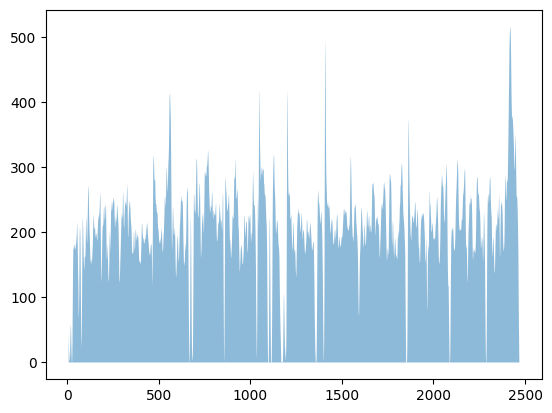

In [17]:
import matplotlib.pyplot as plt
# Fill under the power curve
plt.fill_between(df.index, df['power_5s'], 0, alpha=0.5)